In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

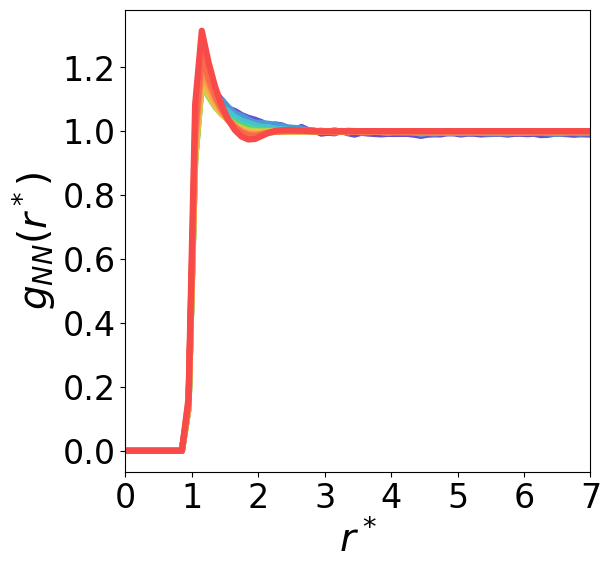

In [ ]:

base_dir = "./" 
os.chdir(base_dir)

gzz_files = sorted(glob.glob("gnn_LD_1_WCA_*.csv"))


r_values = [float(name.split("_")[-1].replace(".csv","")) for name in gzz_files]

colors_hex = [
    '#6b4ad3', '#4a99d3', '#4ac0d3', '#4ad3a3', '#70d34a',
    '#b3d34a', '#e9c84a', '#f9ae4a', '#f98c4a', '#f96a4a', '#f94a4a'
]

def fit_function(r, A, l, omega, phi):
    return A * np.exp(-r / l) * np.abs(np.cos(omega * r + phi))

def fit_function_simple(r, A, l):
    return A * np.exp(-r / l)


plt.figure(figsize=(6,6))
plt.xlim(0, 7)
plt.xticks([0,1,2,3,4,5,6,7], fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel(r'$r^*$', fontsize=28)
plt.ylabel(r'$g_{NN}(r^*)$', fontsize=28)


for i, (r_value, color) in enumerate(zip(r_values, colors_hex)):
    file = f"gnn_LD_1_WCA_{r_value}.csv"
    data = pd.read_csv(file)

    x = np.array(data["r"])
    y = np.array(data["gNN_mean"])
    yerr = data["gNN_err"]

    plt.plot(x, y, linestyle="-", color=color, linewidth=4.5, label=f"r={r_value}")
    plt.fill_between(x, y-yerr, y+yerr, color = color, alpha=0.4)

plt.show()

